### **Estudo sobre ortogonalização**

---

Gabriel Oukawa <br>
Álgebra linear para ciência de dados <br>
2º Semestre de 2025

---


O presente relatório tem como objetivo realizar um estudo sobre dois diferentes métodos de ortogonalização: Gram-Schmidt clássico vs. modificado.<br>

## **1. Gram-Schmidt clássico *vs.* modificado** ##



In [6]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [29]:
# Implementação clássica do método Gram-Schmidt (Algoritmo 7.1, Lecture 7, página 51)
def cgs(A):

    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j].copy()
        for i in range(j):
            R[i, j] = Q[:, i].T @ A[:, j]
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        if R[j, j] == 0:
            break
        Q[:, j] = v / R[j, j]
    return Q, R

# Implementação modificada do método Gram-Schmidt (Algoritmo 8.1, Lecture 8, página 58)
def mgs(A):

    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    V = A.copy()

    for i in range(n):
        R[i, i] = np.linalg.norm(V[:, i])
        if R[i, i] == 0:
            break
        Q[:, i] = V[:, i] / R[i, i]
        for j in range(i + 1, n):
            R[i, j] = Q[:, i].T @ V[:, j]
            V[:, j] = V[:, j] - R[i, j] * Q[:, i]
    return Q, R

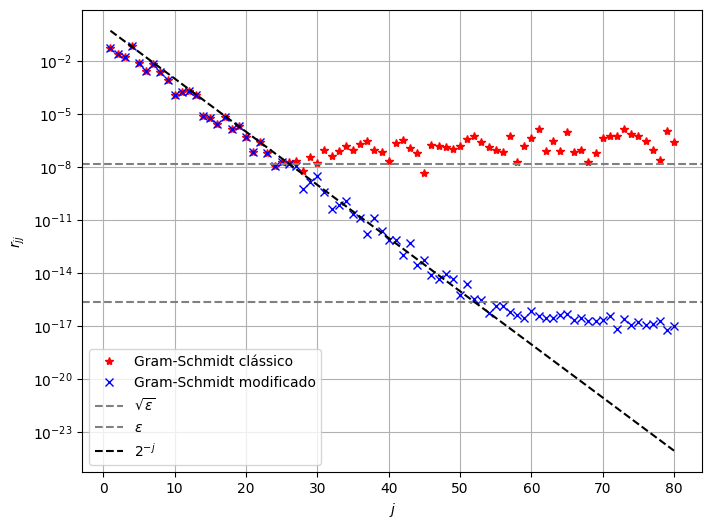

In [28]:
# Exemplo: Experimento 2 (Lecture 9, página 65)
U, _ = np.linalg.qr(np.random.randn(80, 80))
V, _ = np.linalg.qr(np.random.randn(80, 80))

S = np.diag(2.0 ** (-np.arange(1, 81)))

A = U @ S @ V

QC, RC = cgs(A)

QM, RM = mgs(A)

r_clgs = np.diag(RC)
r_mgs = np.diag(RM)

plt.figure(figsize=(8,6))
j = np.arange(1, 81)
plt.semilogy(j, r_clgs, '*', color='red', label='Gram-Schmidt clássico')
plt.semilogy(j, r_mgs, 'x', color='blue', label='Gram-Schmidt modificado')

eps = np.finfo(float).eps
line1 = plt.axhline(np.sqrt(eps), color='gray', linestyle='--', label=r'$\sqrt{\epsilon}$')
line2 = plt.axhline(eps, color='gray', linestyle='--', label=r'$\epsilon$')
plt.semilogy(j, 2.0**(-j), 'k--', label=r'$2^{-j}$')

plt.xlabel(r'$j$')
plt.ylabel(r'$r_{jj}$')
plt.legend()
plt.grid(True, which="both")
plt.show()

A figura acima ilustra que o método de Gram-Schmidt modificado é numericamente mais estável que o clássico. <br>

No Gram-Schmidt clássico, os valores das diagonais de *r* > 28 se degradam rapidamente e caem abaixo da raiz quadrada da precisão da máquina ($\sqrt{\epsilon}$). No Gram-Schmidt modificado, isso só acontece para um *r* > 52, no entanto, ainda se mantém próximos da precisão da máquina (${\epsilon}$).

## **2. Perda numérica de ortogonalidade** ##

In [34]:
# Exemplo: Experimento 3 (Lecture 9, página 67)
A = np.array([[0.70000, 0.70711],
              [0.70001, 0.70711]])

a1 = A[:, 0]
a2 = A[:, 1]

r11 = np.linalg.norm(a1)
q1 = a1 / r11

r12 = np.dot(q1, a2)
v2 = a2 - r12 * q1

r22 = np.linalg.norm(v2)
q2 = v2 / r22

# QR (já implementado)
Qh, Rh = np.linalg.qr(A)
ort_qr = np.linalg.norm(Qh.T @ Qh - np.eye(2))

# Gram-Schmidt modificado
Qgs, Rgs = mgs(A)
ort_mgs = np.linalg.norm(Qgs.T @ Qgs - np.eye(2))

# Resultados
print(f"QR (Householder): {ort_qr:.3e}")
print(f"Gram-Schmidt modificado: {ort_mgs:.3e}")

QR (Householder): 2.341e-16
Gram-Schmidt modificado: 3.255e-11


Embora com um resultado ligeiramente diferente do teste conduzido no livro, o resultado acima mostra que o método Gram-Schmidt modificado perde aproximadamente cinco dígitos no teste de ortogonalidade em comparação com o método QR.